In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4329.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4223.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4253.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4190.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4354.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4136.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4226.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4214.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4888.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4170.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4323.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4262.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4788.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4657.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4387.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4255.jpg
/kaggle/

In [3]:

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
import os

In [4]:
## set the path of data_train and data_test
train_path="../input/cat-and-dog/training_set/training_set"
test_path="../input/cat-and-dog/test_set/test_set"
print(os.listdir(train_path))
print(os.listdir(test_path))

['dogs', 'cats']
['dogs', 'cats']


'dog.1942.jpg'

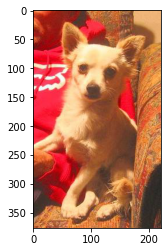

In [5]:
# plot a single image to check the path
plt.imshow(plt.imread("../input/cat-and-dog/test_set/test_set/dogs/dog.4329.jpg"))
os.listdir(os.path.join(train_path,"dogs"))[1]

In [6]:
train_list=[]  # Create a list of training data for visualization

for dirname, _, filenames in os.walk('../input/cat-and-dog/training_set/training_set'):
    for filename in filenames:
        train_count=os.path.join(dirname, filename)
        train_list.append(train_count)

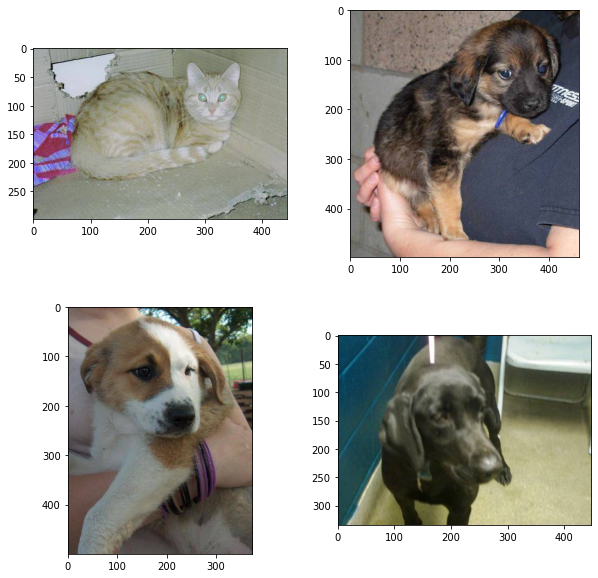

In [7]:
## we plot a random Image from the training set
fig,ax=plt.subplots(2,2,figsize=(10,10))
ax[0][0].imshow(plt.imread(np.random.choice(train_list)))
ax[0][1].imshow(plt.imread(np.random.choice(train_list)))
ax[1][0].imshow(plt.imread(np.random.choice(train_list)))
ax[1][1].imshow(plt.imread(np.random.choice(train_list)));

In [8]:
test_list=[]  # Create a list of testing data for visualization

for dirname, _, filenames in os.walk('../input/cat-and-dog/test_set/test_set'):
    for filename in filenames:
        train_count=os.path.join(dirname, filename)
        test_list.append(train_count)

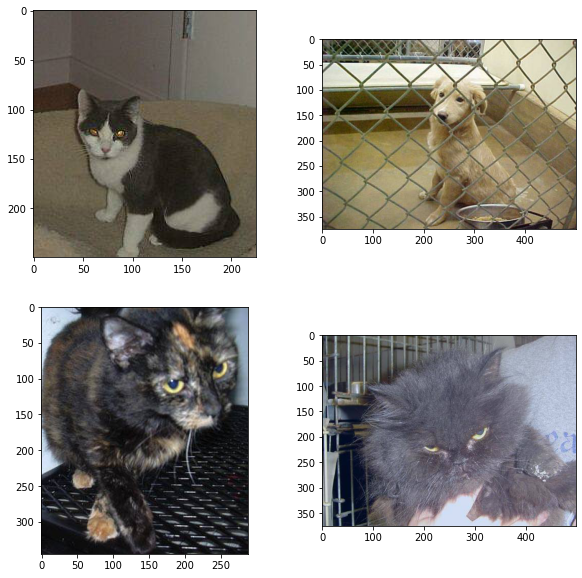

In [9]:
# VISUALISATION OF RANDOM IMAGE
fig,ax=plt.subplots(2,2,figsize=(10,10))
ax[0][0].imshow(plt.imread(np.random.choice(test_list)))
ax[0][1].imshow(plt.imread(np.random.choice(test_list)))
ax[1][0].imshow(plt.imread(np.random.choice(test_list)))
ax[1][1].imshow(plt.imread(np.random.choice(test_list)));

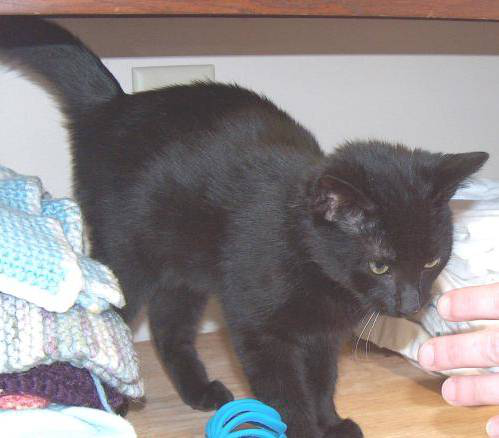

In [10]:
# let display a image with PIL
Image.open(np.random.choice(test_list))

# transform the data in tensor and visuzalisation

In [11]:
train_transform = transforms.Compose([
        transforms.RandomRotation(10),      # rotate +/- 10 degrees
        transforms.RandomHorizontalFlip(),  # reverse 50% of images
        transforms.Resize(224),             # resize shortest side to 224 pixels
        transforms.CenterCrop(224),         # crop longest side to 224 pixels at center
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

test_transform = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

In [12]:
# choice a random_image in test_list and train_list
np.random.seed(42)
img_a=np.random.choice(train_list)
img_b=np.random.choice(test_list)
print(f"Original image shape is {plt.imread(img_a).shape}")

Original image shape is (333, 499, 3)


In [13]:
img_a_tran=train_transform(Image.open(img_a)) ## We need to use Image from PIL to transform the image []
img_b_tran=train_transform(Image.open(img_b))
print(f"Original image shape is {plt.imread(img_a).shape}")
print(f"Transformed image shape is {img_a_tran.shape}")
print(f"Transformed Permuted shape is {img_a_tran.permute(1,2,0).shape}") # we need to permute the shape of image[tensor_format] to plot in matplotlib

Original image shape is (333, 499, 3)
Transformed image shape is torch.Size([3, 224, 224])
Transformed Permuted shape is torch.Size([224, 224, 3])


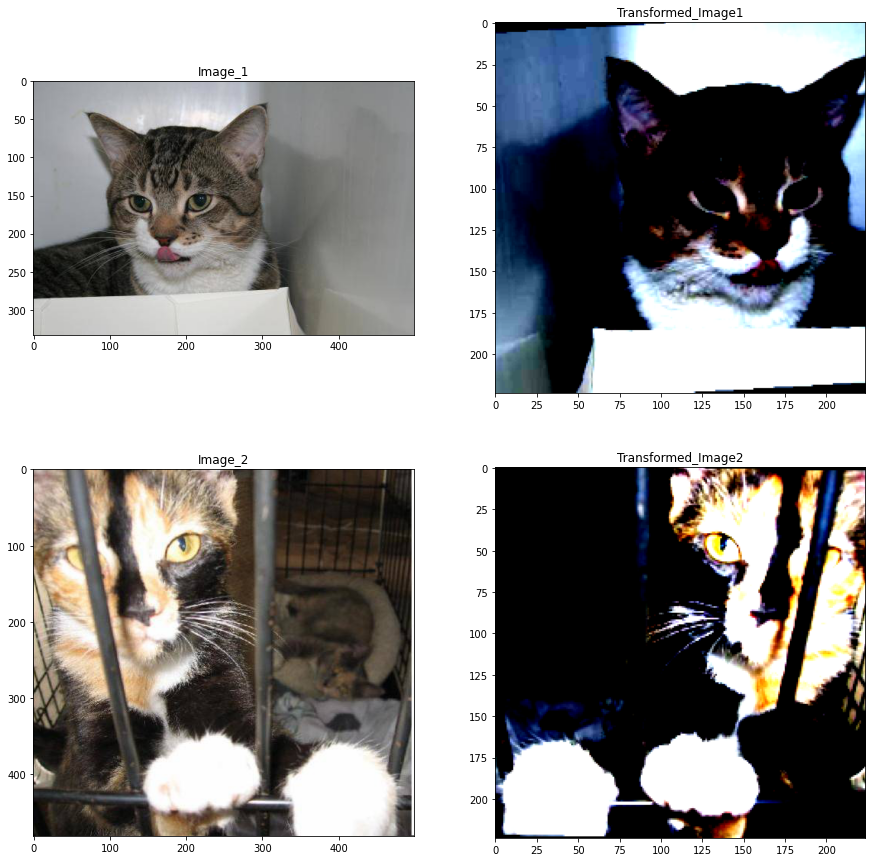

In [14]:
## ## visualize 2 random Original Image and the transformed image
fig,ax=plt.subplots(2,2,figsize=(15,15))

ax[0][0].imshow(plt.imread(img_a))
ax[0][0].set_title('Image_1')
ax[0][1].set_title('Transformed_Image1')
ax[0][1].imshow((img_a_tran.permute(1,2,0)))

ax[1][0].imshow(plt.imread(img_b))
ax[1][0].set_title('Image_2')
ax[1][1].imshow((img_b_tran.permute(1,2,0)))
ax[1][1].set_title('Transformed_Image2');

# Preprocessing Data in Image_Folder and Dataloader

In [15]:
## we use Image Folder from torchvision and path of test_data and train_data to create our train data
train_data=ImageFolder(root=train_path,transform=train_transform)
test_data=ImageFolder(root=test_path,transform=test_transform)

In [16]:
# chech len of data
print(len(train_data),len(test_data))

8005 2023


In [17]:
# chech data class
print(train_data.class_to_idx)
print(train_data.classes)

{'cats': 0, 'dogs': 1}
['cats', 'dogs']


In [18]:
# create a train and test data per batch of 10
train_dataloader=DataLoader(dataset=train_data,batch_size=10,shuffle=True)
test_dataloader=DataLoader(dataset=test_data,batch_size=10)
print(len(train_dataloader),len(test_dataloader))

801 203


In [19]:
# chech the shape of one batch
img,label=next(iter(train_dataloader))
#print(f" One bacht of the data {img.shape}") 
#print(f" for one Image {img[0].shape}") # but the model need a shape of 4 dimension [batch,color_channels=3, height=224, width=224]

# Define a model and testing it to single image from train_loader before training 

In [20]:
# define the model class

class nn_model(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.conv1=nn.Conv2d(in_channels=3,out_channels=6,kernel_size=3,padding=1,stride=2)
        self.conv2=nn.Conv2d(in_channels=6,out_channels=12,kernel_size=3,padding=1)
        
        self.conv3=nn.Conv2d(in_channels=12,out_channels=9,kernel_size=3,padding=0)
        self.flat=nn.Flatten()
        self.fc1=nn.Linear(in_features=6084,out_features=3)# mat1 and mat2 shapes cannot be multiplied (1x9826 and 2601x6)
        self.fc2=nn.Linear(in_features=3,out_features=2)
        
    def forward(self,x):
        x=self.conv1(x)
        x = F.max_pool2d(x, 2, 2)
        x=F.relu(x)
        x=self.conv2(x)
        x = F.max_pool2d(x, 2, 2)
        x=F.relu(x)
        x=self.conv3(x)
        
        #print(x.shape) allow us to check the input for our fc1
        x=self.flat(x)
        x=self.fc1(x)
        x=F.relu(x)
        x=self.fc2(x)
        
        return F.log_softmax(x,dim=1)

In [21]:
torch.manual_seed(42)
model=nn_model()
optimizer=torch.optim.Adam(model.parameters(),lr=0.005)
criterion=nn.CrossEntropyLoss()
model

nn_model(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(12, 9, kernel_size=(3, 3), stride=(1, 1))
  (flat): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=6084, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=2, bias=True)
)

In [22]:
## we test the model in one single image of our batch_data[10 image]
single_image=img[0].unsqueeze(dim=0) # add a four dimension cause of model need [batch,color_channels, height, width]
single_image.shape

torch.Size([1, 3, 224, 224])

In [23]:
# prediction of the model (not train)
torch.max(model(single_image).data,1)[1]

tensor([1])

In [24]:
a,b=torch.max(model(single_image),1)
print(a)
print(b.item())

tensor([-0.6718], grad_fn=<MaxBackward0>)
1


{'cats': 0, 'dogs': 1}


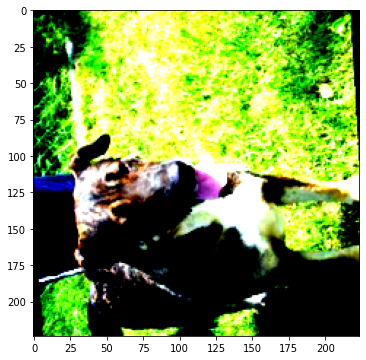

In [25]:
plt.subplots(figsize=(10,6))
plt.imshow(single_image.permute(3,2,1,0).squeeze().numpy())
print(train_data.class_to_idx)

In [26]:
!pip install torchinfo

In [27]:
from torchinfo import summary

In [28]:
# chech the number of parameters
summary(model,input_size=[1,3,224,224])

Layer (type:depth-idx)                   Output Shape              Param #
nn_model                                 [1, 2]                    --
├─Conv2d: 1-1                            [1, 6, 112, 112]          168
├─Conv2d: 1-2                            [1, 12, 56, 56]           660
├─Conv2d: 1-3                            [1, 9, 26, 26]            981
├─Flatten: 1-4                           [1, 6084]                 --
├─Linear: 1-5                            [1, 3]                    18,255
├─Linear: 1-6                            [1, 2]                    8
Total params: 20,072
Trainable params: 20,072
Non-trainable params: 0
Total mult-adds (M): 4.86
Input size (MB): 0.60
Forward/backward pass size (MB): 0.95
Params size (MB): 0.08
Estimated Total Size (MB): 1.63

In [29]:
torch.manual_seed(42)


epochs = 3

for epoch in (range(epochs)):
    train_loss = 0
    train_accuracy = 0
    
    for data, label in train_dataloader:
        model.train()

        output = model(data)
        loss = criterion(output, label)
        
        # back prop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # normalize and calcul loss and accuracy
        acc = ((output.argmax(dim=1) == label).float().mean())
        train_accuracy += acc/len(train_dataloader)
        train_loss += loss/len(train_dataloader)
        
    print(f'Epoch {epoch+1} | Train_acc {train_accuracy:.2f} | Train_loss {train_loss:.5f}')
    
    # testing
    model.eval()
    with torch.no_grad():
        test_accuracy=0
        test_loss =0
        for data, label in test_dataloader:

            
            test_output = model(data)
            val_loss = criterion(test_output,label)
            
            
            acc = ((test_output.argmax(dim=1) == label).float().mean())
            test_accuracy += acc/ len(test_dataloader)
            test_loss += val_loss/ len(test_dataloader)
            
        print(f'Epoch {epoch+1} | test_acc:{test_accuracy:.2f} | Test_loss: {test_loss:.5f}')

Epoch 1 | Train_acc 0.50 | Train_loss 0.69397
Epoch 1 | test_acc:0.50 | Test_loss: 0.69358
Epoch 2 | Train_acc 0.50 | Train_loss 0.69373
Epoch 2 | test_acc:0.50 | Test_loss: 0.69314
Epoch 3 | Train_acc 0.49 | Train_loss 0.69362
Epoch 3 | test_acc:0.50 | Test_loss: 0.69345


In [30]:
# model have a poor accuracy just guessing
model.eval()
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_dataloader:
        y_pred = model(X_test)
        predicted = torch.max(y_pred,1)[1]
        correct += (predicted == y_test).sum()
        
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 1011/2023 =  49.975%


# Transfert Learning 

In [31]:
from torchvision import models

In [32]:
## we try EfficientNet
EffiNet=models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [33]:
## Check the input shape in our classier
EffiNet.classifier

Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [34]:
# Freeze feature parameters
for param in EffiNet.parameters():
    param.requires_grad = False

In [35]:
# define the classifier of our model
torch.manual_seed(42)
EffiNet.classifier = nn.Sequential(nn.Dropout(0.2),
                                 nn.Linear(9216, 2),
                                 nn.LogSoftmax(dim=1))
print(EffiNet.classifier)

Sequential(
  (0): Dropout(p=0.2, inplace=False)
  (1): Linear(in_features=9216, out_features=2, bias=True)
  (2): LogSoftmax(dim=1)
)


In [36]:
# define the loss fonction and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(EffiNet.classifier.parameters(), lr=0.001)

In [37]:
train_data.classes

['cats', 'dogs']

In [38]:
torch.manual_seed(42)
torch.manual_seed(42)
from tqdm.auto import tqdm

epochs = 2

for epoch in tqdm(range(epochs)):
    train_loss = 0
    train_accuracy = 0
    
    for data, label in train_dataloader:
        #Training the model
        EffiNet.train()

        output = EffiNet(data)
        loss = criterion(output, label)
        
        # back prop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        acc = ((output.argmax(dim=1) == label).float().mean())
        train_accuracy += acc/len(train_dataloader)
        train_loss += loss/len(train_dataloader)
        
    print(f'Epoch_Training {epoch+1}, | Train_acc {train_accuracy:.2f} | Train_loss {train_loss:.5f}')
    
    # Testing the model
    EffiNet.eval()
    with torch.no_grad():
        test_accuracy=0
        test_loss =0
        for data, label in test_dataloader:

            
            output = EffiNet(data)
            val_loss = criterion(output,label)
            
            
            acc = ((output.argmax(dim=1) == label).float().mean())
            test_accuracy += acc/ len(test_dataloader)
            test_loss += val_loss/ len(test_dataloader)
            
        print(f'Epoch_Testing** {epoch+1},| test_acc:{test_accuracy:.2f} | Test_loss: {test_loss:.5f}')

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch_Training 1, | Train_acc 0.92 | Train_loss 0.49448
Epoch_Testing** 1,| test_acc:0.95 | Test_loss: 0.38880
Epoch_Training 2, | Train_acc 0.94 | Train_loss 0.53647
Epoch_Testing** 2,| test_acc:0.95 | Test_loss: 0.47991


In [39]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_dataloader:
        y_pred = EffiNet(X_test)
        predicted = torch.max(y_pred,1)[1]
        correct += (predicted == y_test).sum()
        
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 1922/2023 =  95.007%


In [42]:
## save the model

Effi_model=torch.save(EffiNet,'Effi_model.pt')